In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data

In [37]:
df = pd.read_csv("../data/vmCloud_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   vm_id                      object 
 1   timestamp                  object 
 2   cpu_usage                  float64
 3   memory_usage               float64
 4   network_traffic            float64
 5   power_consumption          float64
 6   num_executed_instructions  float64
 7   execution_time             float64
 8   energy_efficiency          float64
 9   task_type                  object 
 10  task_priority              object 
 11  task_status                object 
dtypes: float64(7), object(5)
memory usage: 183.1+ MB


In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [39]:
df.head()

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting


In [40]:
df.isnull().sum()

vm_id                        200638
timestamp                    200666
cpu_usage                    199038
memory_usage                 200510
network_traffic              199481
power_consumption            200271
num_executed_instructions    199686
execution_time               199827
energy_efficiency            200042
task_type                    199962
task_priority                199433
task_status                  200306
dtype: int64

<Axes: >

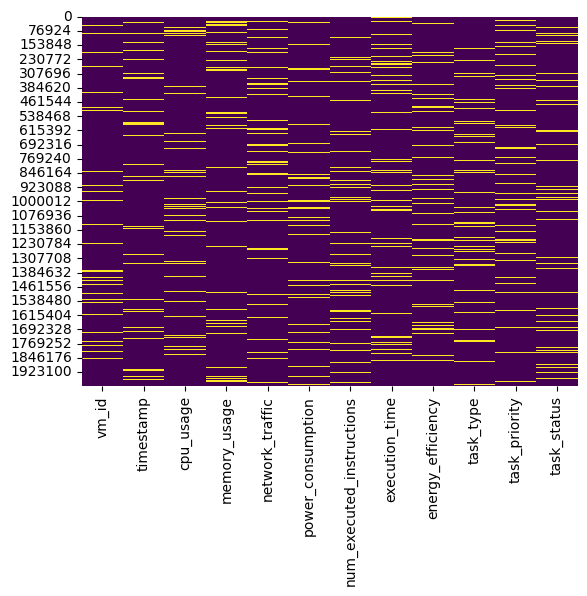

In [41]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [42]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565039 entries, 0 to 1999998
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   vm_id                      565039 non-null  object        
 1   timestamp                  565039 non-null  datetime64[ns]
 2   cpu_usage                  565039 non-null  float64       
 3   memory_usage               565039 non-null  float64       
 4   network_traffic            565039 non-null  float64       
 5   power_consumption          565039 non-null  float64       
 6   num_executed_instructions  565039 non-null  float64       
 7   execution_time             565039 non-null  float64       
 8   energy_efficiency          565039 non-null  float64       
 9   task_type                  565039 non-null  object        
 10  task_priority              565039 non-null  object        
 11  task_status                565039 non-null  object      

In [43]:
df_num = df.copy()

mapping = {'network': 1, 'compute': 2, 'io': 3}
df_num['task_type'] = df['task_type'].map(mapping)

mapping = {'low': 1, 'medium': 2, 'high': 3}
df_num['task_priority'] = df['task_priority'].map(mapping)

mapping = {'waiting': 1, 'running': 2, 'completed': 3}
df_num['task_status'] = df['task_status'].map(mapping)

df_num = df_num.drop(columns=['timestamp', 'vm_id'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 565039 entries, 0 to 1999998
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cpu_usage                  565039 non-null  float64
 1   memory_usage               565039 non-null  float64
 2   network_traffic            565039 non-null  float64
 3   power_consumption          565039 non-null  float64
 4   num_executed_instructions  565039 non-null  float64
 5   execution_time             565039 non-null  float64
 6   energy_efficiency          565039 non-null  float64
 7   task_type                  565039 non-null  int64  
 8   task_priority              565039 non-null  int64  
 9   task_status                565039 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 47.4 MB


# EDA

In [44]:
df.columns

Index(['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic',
       'power_consumption', 'num_executed_instructions', 'execution_time',
       'energy_efficiency', 'task_type', 'task_priority', 'task_status'],
      dtype='object')

In [45]:
df.vm_id.count()

np.int64(565039)

In [46]:
factor = 10

df_sm = df.sample(int(df.cpu_usage.count()/factor), random_state=0)
df_num_sm = df_num.sample(int(df_num.cpu_usage.count()/factor), random_state=0)

<Axes: >

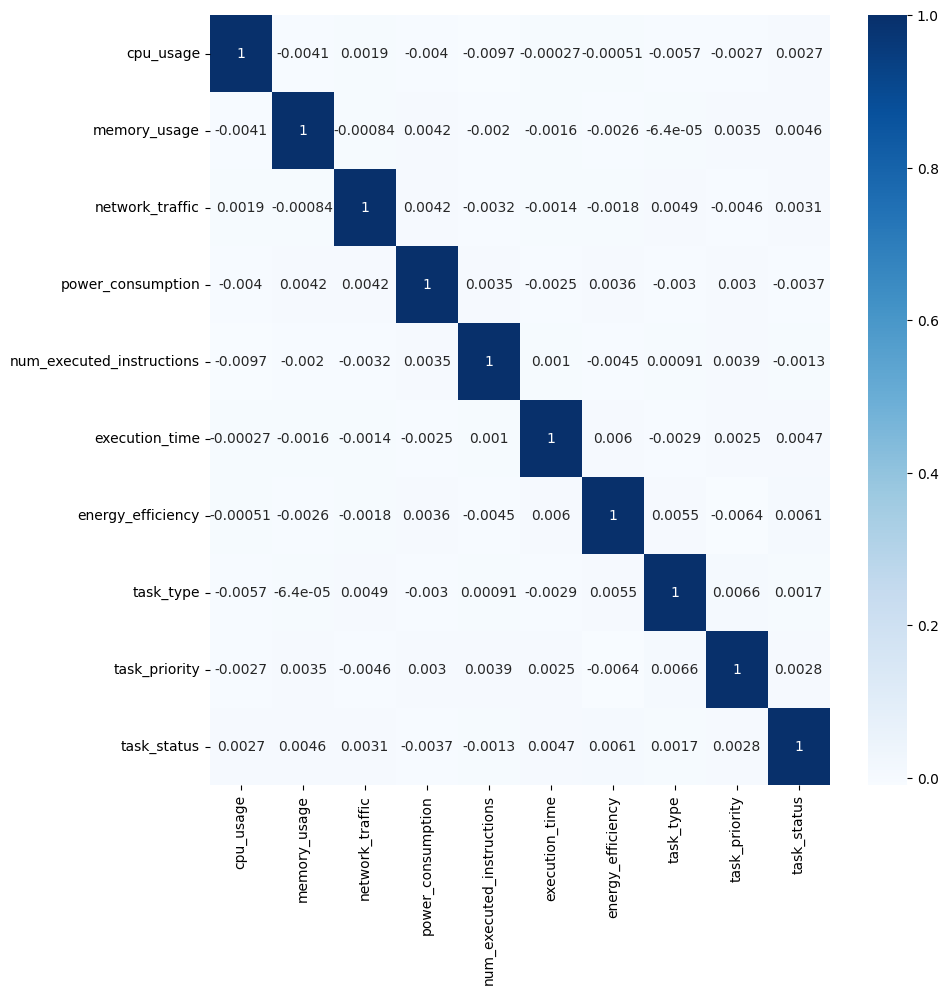

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num_sm.corr(),cbar=True,annot=True,cmap='Blues')

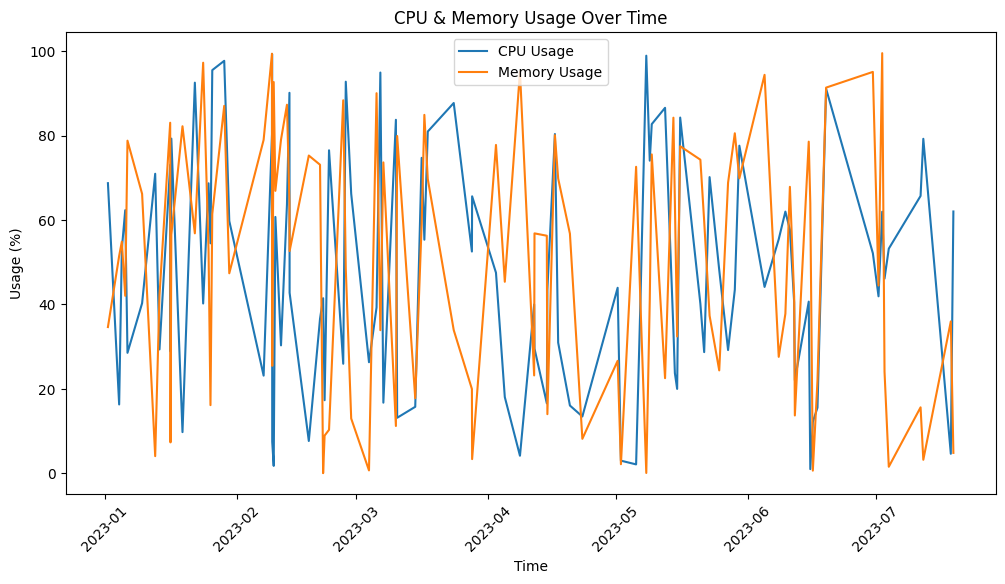

In [48]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sm.sample(100, random_state=0), x='timestamp', y='cpu_usage', label='CPU Usage')
sns.lineplot(data=df_sm.sample(100, random_state=0), x='timestamp', y='memory_usage', label='Memory Usage')
plt.xlabel('Time')
plt.ylabel('Usage (%)')
plt.title('CPU & Memory Usage Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
